In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [153]:
raw_df = pd.read_csv("../../data/dataset.csv")

In [154]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177010 entries, 0 to 177009
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Player_id         177010 non-null  int64  
 1   Season            177010 non-null  int64  
 2   Games             177010 non-null  int64  
 3   PPG               177010 non-null  float64
 4   Goals             177010 non-null  int64  
 5   Assists           177010 non-null  int64  
 6   Yellow_cards      177010 non-null  int64  
 7   Yellow_red_cards  177010 non-null  int64  
 8   Red_cards         177010 non-null  int64  
 9   Penalty_goals     177010 non-null  int64  
 10  Minutes_per_goal  177010 non-null  float64
 11  Minutes_played    177010 non-null  int64  
 12  Club_id           177010 non-null  int64  
 13  Competition       177010 non-null  object 
 14  MarketValue       177010 non-null  int64  
 15  name              177010 non-null  object 
 16  age               17

In [155]:
raw_df.describe()

,Player_id,Season,Games,PPG,Goals,Assists,Yellow_cards,Yellow_red_cards,Red_cards,Penalty_goals,...,MarketValue,age,Days_injured,international,W,D,L,Points,Goales_scored,Goales_conceded
count,1.770100e+05,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,...,1.770100e+05,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000,177010.000000
mean,1.825353e+05,2015.745851,24.540862,1.336630,2.989780,1.944794,3.659951,0.114858,0.101966,0.265680,...,2.242706e+06,24.731456,20.515457,0.656991,12.870730,8.502356,11.416683,47.063629,45.078159,41.640495
std,1.666608e+05,4.420939,11.329757,0.583231,4.361486,2.706910,3.021125,0.350760,0.325938,0.902752,...,6.320170e+06,4.553011,1563.572973,0.474716,5.635678,3.429719,5.357900,17.144251,16.253817,14.682202
min,1.000000e+01,2003.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-32.000000,0.000000,0.000000
25%,5.211200e+04,2013.000000,16.000000,0.900000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,2.000000e+05,21.000000,0.000000,0.000000,9.000000,6.000000,7.000000,35.000000,34.000000,31.000000
50%,1.296930e+05,2016.000000,25.000000,1.350000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,...,5.000000e+05,24.000000,0.000000,1.000000,12.000000,8.000000,11.000000,46.000000,44.000000,41.000000
75%,2.717430e+05,2019.000000,33.000000,1.750000,4.000000,3.000000,5.000000,0.000000,0.000000,0.000000,...,1.500000e+06,28.000000,0.000000,1.000000,16.000000,11.000000,15.000000,58.000000,55.000000,51.000000
max,1.059630e+06,2022.000000,84.000000,4.180000,73.000000,35.000000,26.000000,4.000000,5.000000,15.000000,...,2.000000e+08,43.000000,657380.000000,1.000000,35.000000,24.000000,37.000000,113.000000,121.000000,134.000000


In [156]:
df = raw_df.copy()
df.columns = df.columns.str.lower()
df.columns # PPG: Points per game 

### Fixes on the raw data: ----

# Remove rows with 2003 season:
df = df.query("season > 2003")

In [157]:
players = pd.read_csv("../../data/players.csv")  # Kaggle dataset
print(players.columns)


Index(['player_id', 'name', 'current_club_id', 'current_club_name',
       'country_of_citizenship', 'country_of_birth', 'city_of_birth',
       'date_of_birth', 'position', 'sub_position', 'foot', 'height_in_cm',
       'market_value_in_eur', 'highest_market_value_in_eur', 'agent_name',
       'contract_expiration_date', 'current_club_domestic_competition_id',
       'first_name', 'last_name', 'player_code', 'image_url', 'last_season',
       'url'],
      dtype='object')


In [158]:
df_age_val = pd.merge(df[["player_id", "season", "marketvalue"]], players[["player_id", "date_of_birth"]], on="player_id", how="left")
#df_age_val = df_age_val.groupby("season")
#df_age_val = df_age_val.query("season > 2003")

df_age_val["date_of_birth"] = pd.to_datetime(df_age_val["date_of_birth"])
df_age_val["age"] = df_age_val.season - df_age_val.date_of_birth.dt.year


df_age_val["season"] = df_age_val["season"].astype("category")

df_age_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177008 entries, 0 to 177007
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   player_id      177008 non-null  int64         
 1   season         177008 non-null  category      
 2   marketvalue    177008 non-null  int64         
 3   date_of_birth  177008 non-null  datetime64[ns]
 4   age            177008 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 6.9 MB


In [159]:
df_age_val.count()

player_id        177008
season           177008
marketvalue      177008
date_of_birth    177008
age              177008
dtype: int64

<AxesSubplot: xlabel='marketvalue', ylabel='season'>

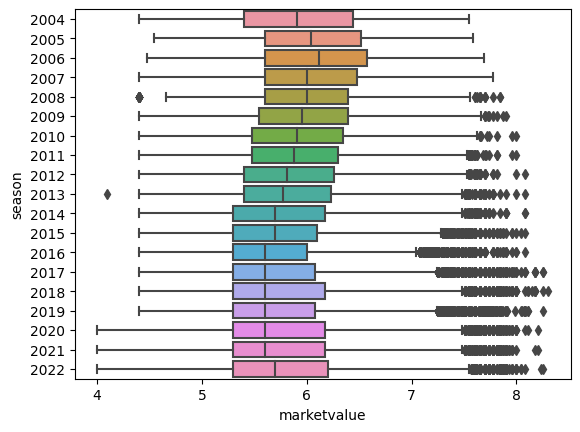

In [160]:
# Boxplot, Distribution of market value per season
sns.boxplot(df_age_val, x=df_age_val["marketvalue"].apply(np.log10), y="season")

<AxesSubplot: xlabel='age', ylabel='season'>

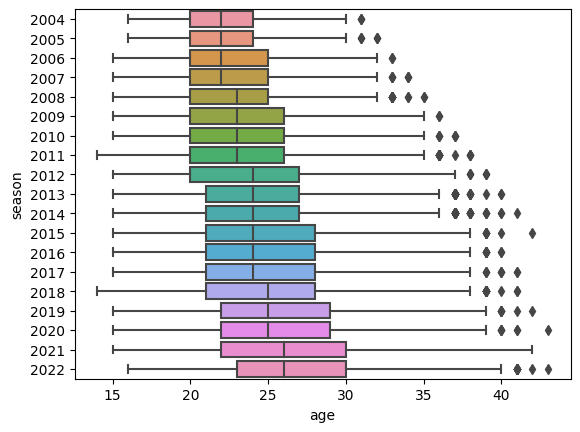

In [161]:
# Boxplot, Distribution of market value per season
sns.boxplot(df_age_val, x="age", y="season")

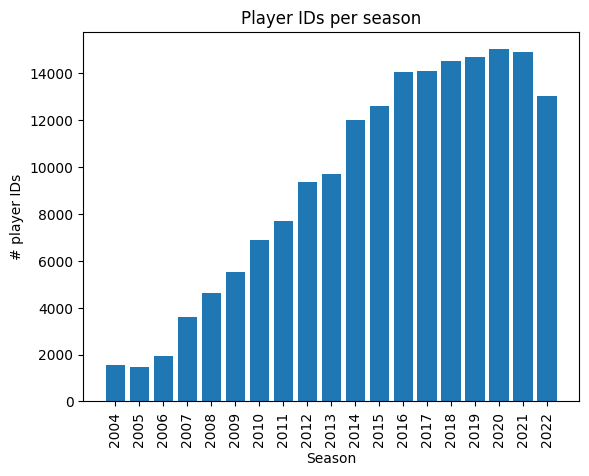

In [162]:

x = df.season.unique()
y = [df[df.season == s].player_id.count() for s in x]


plt.bar(x,y)
plt.title("Player IDs per season")
plt.xlabel("Season")
plt.ylabel("# player IDs")
plt.xticks(x, rotation=90)
plt.show()

[Text(0.5, 1.0, 'Count of games played')]

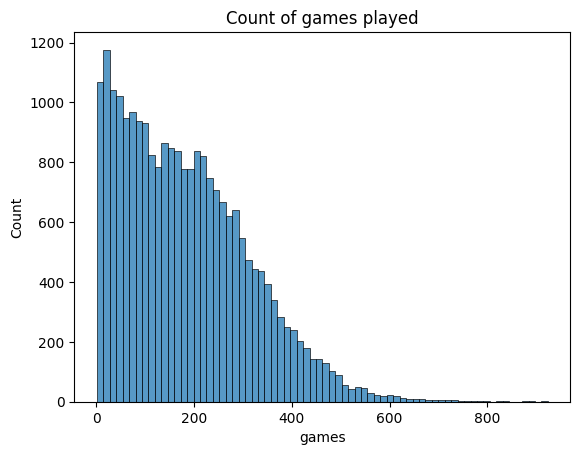

In [163]:
df_games = df[["player_id", "games"]]
df_games = df_games.groupby("player_id").sum()
sns.histplot(df_games, x="games").set(title="Count of games played")

[Text(0.5, 1.0, 'Count of height')]

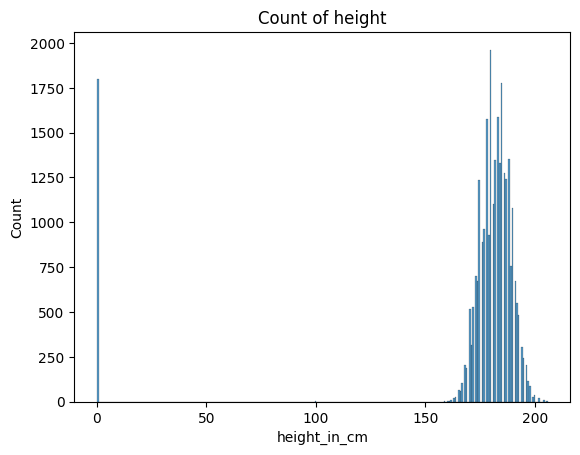

In [164]:
sns.histplot(players, x="height_in_cm").set(title="Count of height")

In [165]:
# Direct copy from https://stackoverflow.com/questions/55910004/get-continent-name-from-country-using-pycountry
import pycountry_convert as pc

def country_to_continent(country_name):
    country_alpha2 = pc.country_name_to_country_alpha2(country_name)
    country_continent_code = pc.country_alpha2_to_continent_code(country_alpha2)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name


uncertain_continent = {
    "England" : "Europe",
    "Wales" : "Europe",
    "Scotland" : "Europe",
    "Northern Ireland" : "Europe",
    "Kosovo" : "Europe",
    "Bosnia-Herzegovina" : "Europe",
    "Cote d'Ivoire" : "Africa",
    "DR Congo" : "Africa",
    "Southern Sudan" : "Africa",
    "The Gambia" : "Africa",
    "Korea, South" : "Asia",
    "Korea, North" : "Asia",
    "Chinese Taipei" : "Asia",
    "Curacao" : "South America",
    "Saint-Martin" : "North America",
    "Tahiti" : "North America",
    "St. Kitts & Nevis" : "North America",
    "Neukaledonien" : "Oceania"
}

# Example
def foo(country_name):
    try:
        return country_to_continent(country_name)
    except:
        try:
            return uncertain_continent[country_name]
        except:
            return "nan"
            

players["continent_of_citizenship"] = players.country_of_citizenship.apply(foo)

In [173]:
df_country = pd.merge(df[["player_id", "season"]], players[["player_id", "continent_of_citizenship"]], on="player_id", how="left")

df_country = df_country[["season","continent_of_citizenship"]].groupby("season").sum()
sns.bar(df_country, x="season").set(title="Count of games played")

AttributeError: module 'seaborn' has no attribute 'bar'